## DATA PREPROCESSING AND FEATURE ENGINEERING

In [1]:
#importing the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading the dataset
cust_data = pd.read_csv('Test.csv')

In [3]:
cust_data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [4]:
cust_data.shape

(100000, 9)

In [5]:
cust_data.columns.values

array(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'], dtype=object)

In [6]:
cust_data.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [7]:
100*cust_data['Churn'].value_counts()/len(cust_data['Churn'])

0    50.221
1    49.779
Name: Churn, dtype: float64

Data is balanced, ratio = 50:50

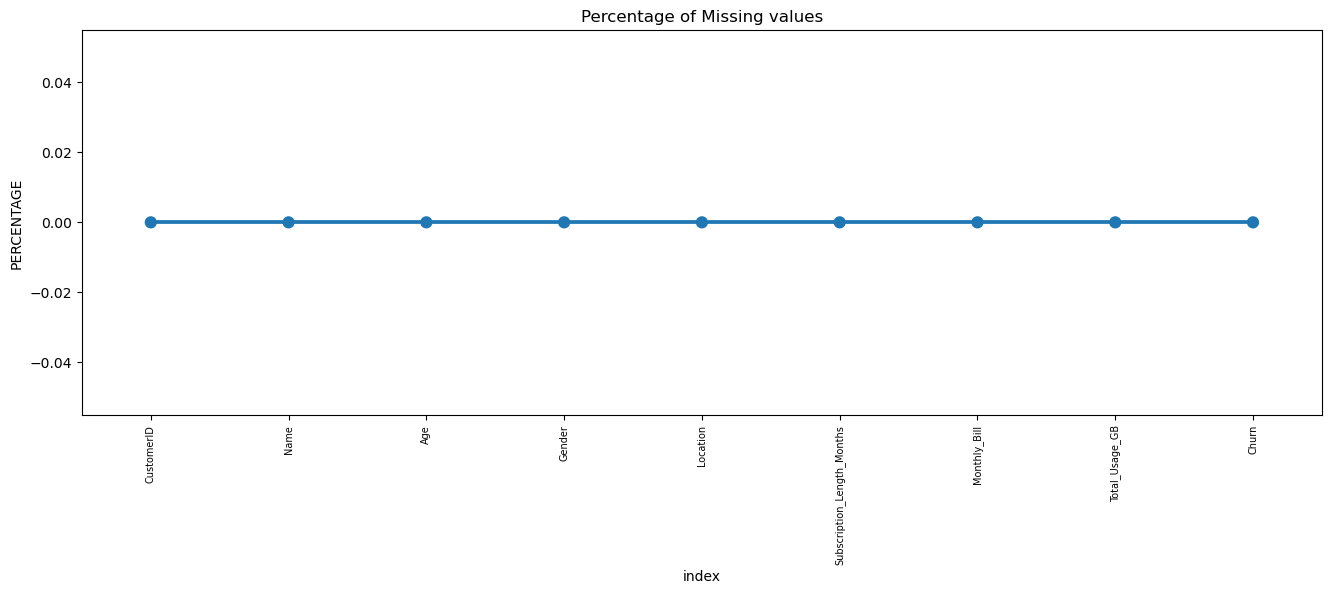

In [8]:
#Checking for missing values
missing = pd.DataFrame((cust_data.isnull().sum())*100/cust_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [9]:
#Creating a copy of data for manipulation and preprocessing
data=cust_data.copy()

In [10]:
data.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

There are no missing values in the data.

In [11]:
# Grouping the subscription length in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 24, 12)]

data['Subscription_Length_Group'] = pd.cut(data.Subscription_Length_Months, range(1, 30, 12), right=False, labels=labels)

In [12]:
data['Subscription_Length_Group'].value_counts()

1 - 12     50021
13 - 24    49979
Name: Subscription_Length_Group, dtype: int64

In [13]:
#Removing columns not required for processing
data.drop(columns= ['CustomerID','Name','Subscription_Length_Months'], axis=1, inplace=True)
data.head()

,Age,Gender,Location,Monthly_Bill,Total_Usage_GB,Churn,Subscription_Length_Group
0,63,Male,Los Angeles,73.36,236,0,13 - 24
1,62,Female,New York,48.76,172,0,1 - 12
2,24,Female,Los Angeles,85.47,460,0,1 - 12
3,36,Female,Miami,97.94,297,1,1 - 12
4,46,Female,Miami,58.14,266,0,13 - 24


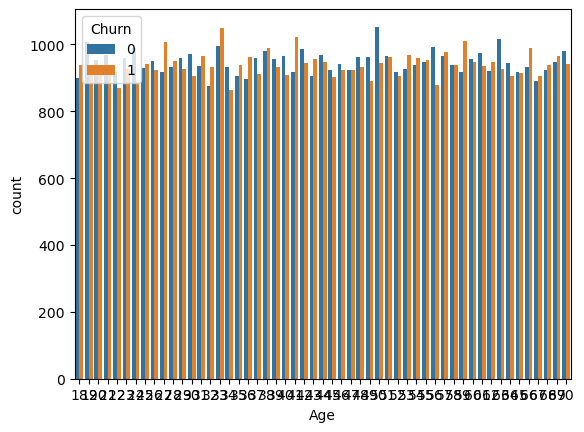

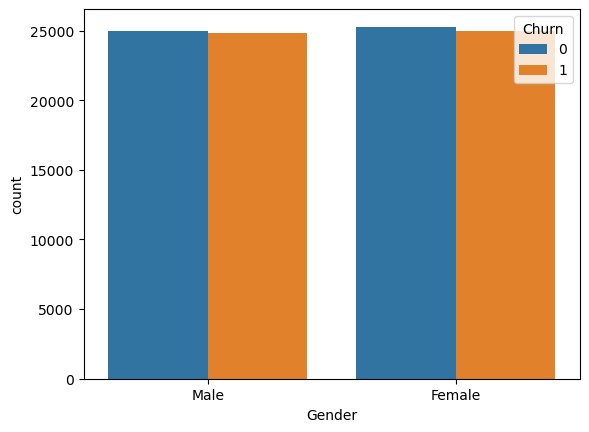

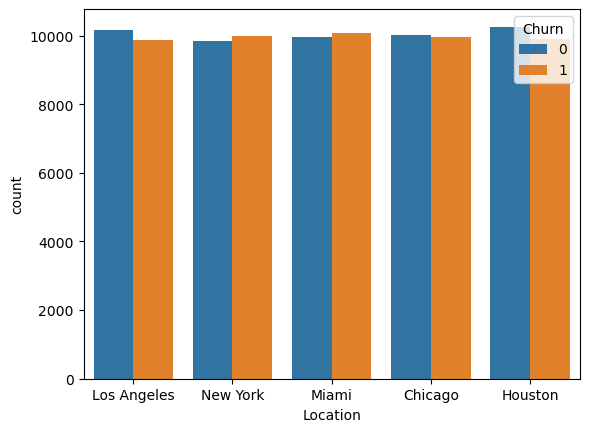

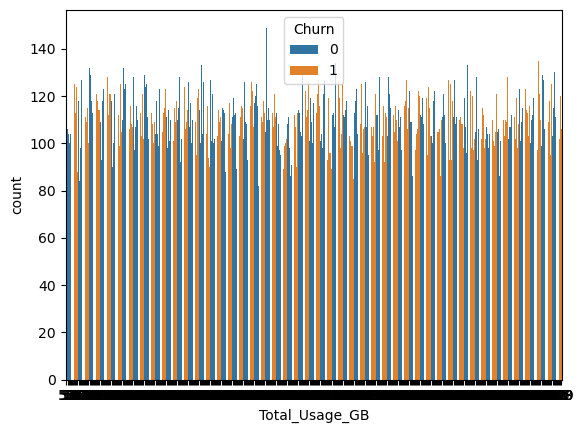

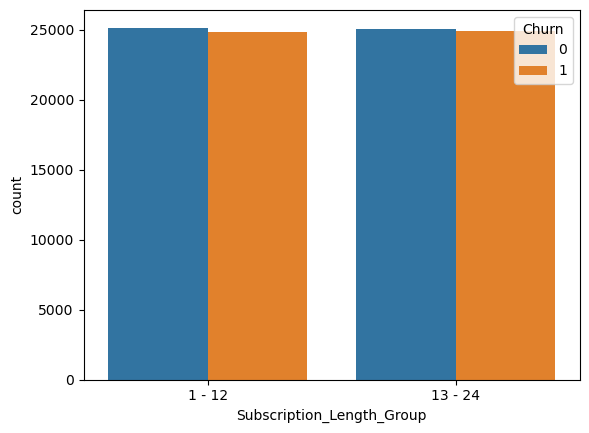

In [14]:
#visualising churn against every independent variable
for i, predictor in enumerate(data.drop(columns=['Churn', 'Monthly_Bill'])):
    plt.figure(i)
    sns.countplot(data=data, x=predictor, hue='Churn')

In [15]:
#one hot encoding
data_dummies = pd.get_dummies(data)
data_dummies.head()

,Age,Monthly_Bill,Total_Usage_GB,Churn,Gender_Female,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Subscription_Length_Group_1 - 12,Subscription_Length_Group_13 - 24
0,63,73.36,236,0,0,1,0,0,1,0,0,0,1
1,62,48.76,172,0,1,0,0,0,0,0,1,1,0
2,24,85.47,460,0,1,0,0,0,1,0,0,1,0
3,36,97.94,297,1,1,0,0,0,0,1,0,1,0
4,46,58.14,266,0,1,0,0,0,0,1,0,0,1


Text(0.5, 1.0, 'Monthly bill by churn')

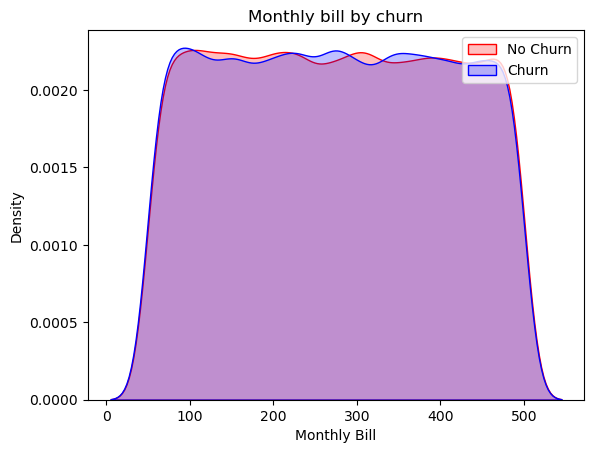

In [16]:
#monthly bill by churn
Mth = sns.kdeplot(data_dummies.Total_Usage_GB[(data_dummies["Churn"] == 0) ],
                color="Red", fill = True)
Mth = sns.kdeplot(data_dummies.Total_Usage_GB[(data_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", fill= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Bill')
Mth.set_title('Monthly bill by churn')

In [17]:
data_dummies.to_csv('churn.csv')